<a href="https://colab.research.google.com/github/DommiiUdomp/Prediction/blob/main/LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [8]:
# Load data

stock = 'ITD.BK'
start = dt.datetime(2019,1,1)
end = dt.datetime(2021,1,1)
data = pdr.get_data_yahoo( stock, start)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,2.18,2.12,2.12,2.18,6742500.0,2.166110
2019-01-03,2.22,2.14,2.18,2.18,11032200.0,2.166110
2019-01-04,2.24,2.12,2.18,2.18,18692900.0,2.166110
2019-01-07,2.28,2.18,2.20,2.26,16130600.0,2.245600
2019-01-08,2.26,2.22,2.26,2.22,4496600.0,2.205855


In [9]:
# Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))
print(scaled_data.shape)

(683, 1)


In [12]:
prediction_days = 60

x_train=[]
y_train=[]

for x in range (prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train),np.array(y_train)
print(x_train.shape, y_train.shape)

(623, 60) (623,)


In [18]:
fearture = 1
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],fearture))
print(x_train.shape)

(623, 60, 1)


In [81]:
# Build the model
def model(input_shape,drop_rate) :
  model = Sequential()
  model.add(LSTM(50, activation='tanh',return_sequences=True, input_shape =(input_shape)))
  model.add(Dropout(drop_rate))
  model.add(LSTM(50, activation='tanh', return_sequences=True))
  model.add(Dropout(drop_rate))
  model.add(LSTM(50, activation='tanh'))
  model.add(Dropout(drop_rate))
  model.add(Dense(1, activation = 'linear')) # Prediction of the next closing value

  model.compile(optimizer='adam',loss='mean_squared_error')
  
  return model

In [82]:
model = model(x_train[0].shape, 0.2)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [83]:
history = model.fit(x_train, y_train, batch_size=None, epochs=100, validation_split=0.15, verbose=1)
frame = pd.DataFrame(history.history)

Epoch 1/100
17/17 [==============================] - 9s 172ms/step - loss: 0.0446 - val_loss: 0.0277
Epoch 2/100
17/17 [==============================] - 2s 99ms/step - loss: 0.0121 - val_loss: 0.0074
Epoch 3/100
17/17 [==============================] - 2s 104ms/step - loss: 0.0087 - val_loss: 0.0121
Epoch 4/100
17/17 [==============================] - 2s 102ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 5/100
17/17 [==============================] - 2s 100ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 6/100
17/17 [==============================] - 2s 100ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 7/100
17/17 [==============================] - 2s 101ms/step - loss: 0.0056 - val_loss: 0.0080
Epoch 8/100
17/17 [==============================] - 2s 101ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 9/100
17/17 [==============================] - 2s 103ms/step - loss: 0.0060 - val_loss: 0.0065
Epoch 10/100
17/17 [==============================] - 2s 101ms/step - loss: 0.0058 - val_los

In [84]:
frame.head()

,loss,val_loss
0,0.044590,0.027715
1,0.012144,0.007357
2,0.008668,0.012133
3,0.008417,0.006624
4,0.006714,0.006234


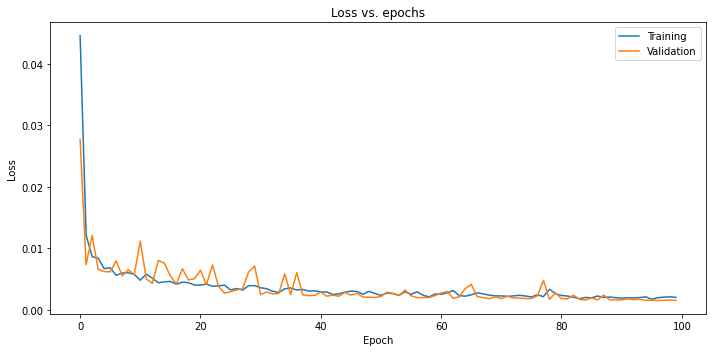

In [86]:
# plot

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'],loc='upper right')
plt.tight_layout()
plt.show()

In [45]:
# Load Test data
test_start=dt.datetime(2021,1,1)
test_end=dt.datetime.now()

test_data=pdr.DataReader(stock,'yahoo',test_start,test_end)
actual_prices=test_data['Close'].values
print(actual_prices.shape)

(196,)


In [47]:
x_total=pd.concat((data['Close'],test_data['Close']),axis=0)
print(x_total.shape)

(879,)


In [48]:
x_inputs=x_total[len(x_total)-len(x_test)-prediction_days:].values
print(x_inputs.shape)

(256,)


In [51]:
x_inputs=np.reshape(x_inputs,(x_inputs.shape[0],fearture))
x_inputs.shape

(256, 1)

In [52]:
x_inputs=scaler.transform(x_in)

In [53]:
# Make predictions on Test data
x_test=[]

for x in range (prediction_days,len(x_inputs)) :
    x_test.append(x_inputs[x-prediction_days:x,0])

In [56]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],fearture))
x_test.shape

(196, 60, 1)

In [87]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

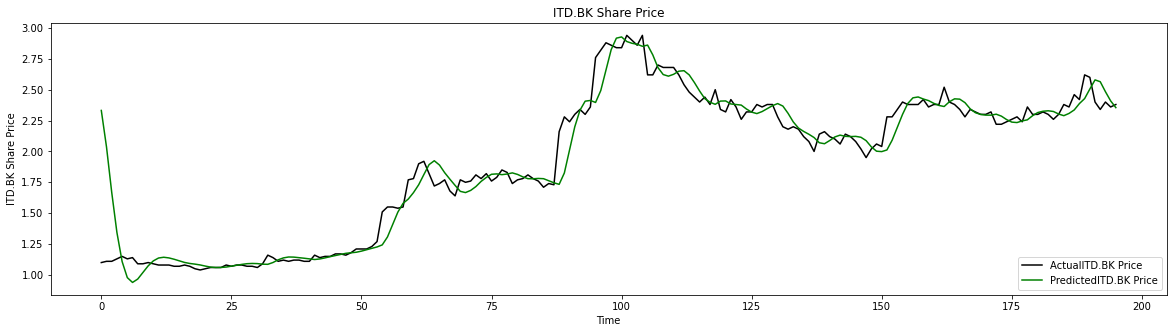

In [88]:
# plot the test predictions
plt.figure(figsize=(20,5))
plt.plot(actual_prices,color='black',label=f'Actual{stock} Price')
plt.plot(predicted_prices,color='green',label=f'Predicted{stock} Price')
plt.title(f'{stock} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{stock} Share Price')

plt.legend(loc='lower right')
plt.show()

In [140]:
# Predict Next day

real_data = [x_inputs[len(x_inputs)-prediction_days:len(x_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],fearture))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print (f'Prediction: {prediction}')

Prediction: [[2.331932]]


#NEW model

In [94]:
# Shared Input Layer
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate

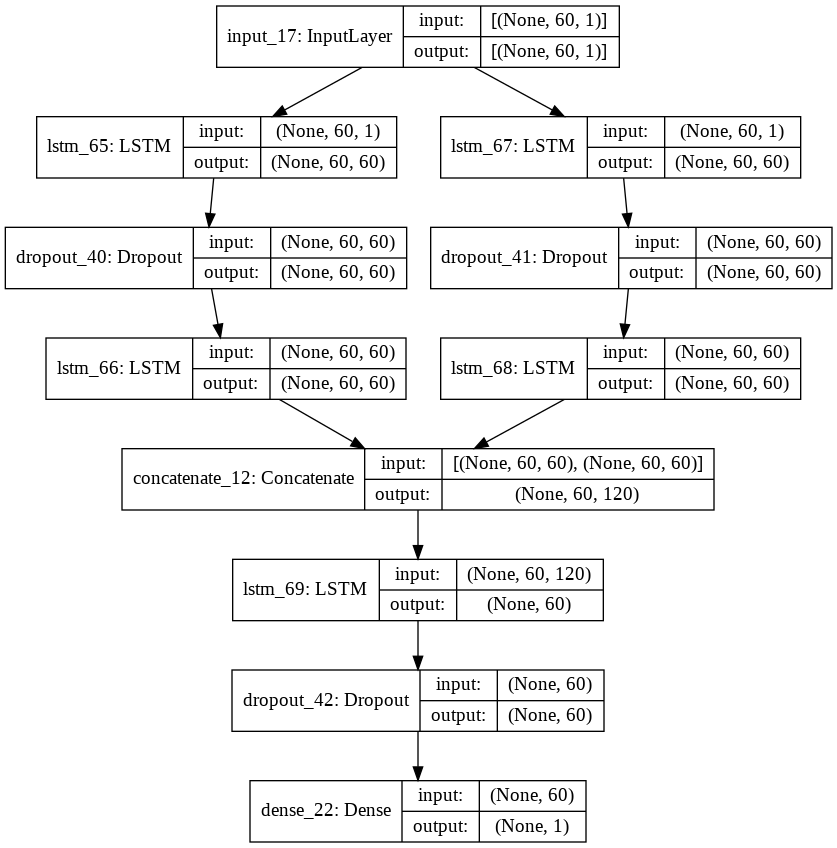

In [147]:
# Build the model
def model_2(input_shape,drop_rate) :
  
  head = Input(shape=(input_shape))

  # first input model
  lstm1 = LSTM(60,return_sequences=True)(head)
  lstm2 = Dropout(drop_rate)(lstm1)
  lstm3 = LSTM(60,return_sequences=True)(lstm2)


  # second input model
  lstm4 = LSTM(60,return_sequences=True)(head)
  lstm5 = Dropout(drop_rate)(lstm4)
  lstm6 = LSTM(60,return_sequences=True)(lstm5)

  # merge input models
  merge = concatenate([lstm3, lstm6])
  lstm7 = LSTM(60)(merge)
  lstm8 = Dropout(drop_rate)(lstm7)
  output = Dense(1)(lstm8)
  
  model_2 = Model(inputs=head, outputs=output)

  model_2.compile (optimizer = tf.keras.optimizers.Adam(learning_rate=0.003) ,
                   loss = 'mse')
  
  return model_2

model_2 = model_2(x_train[0].shape, 0.3)
plot_model(model_2, show_shapes=True, show_layer_names=True)

Epoch 1/100
17/17 [==============================] - 14s 333ms/step - loss: 0.0360 - val_loss: 0.0242
Epoch 2/100
17/17 [==============================] - 2s 145ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 3/100
17/17 [==============================] - 2s 144ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 4/100
17/17 [==============================] - 2s 146ms/step - loss: 0.0060 - val_loss: 0.0102
Epoch 5/100
17/17 [==============================] - 2s 145ms/step - loss: 0.0057 - val_loss: 0.0040
Epoch 6/100
17/17 [==============================] - 2s 143ms/step - loss: 0.0055 - val_loss: 0.0093
Epoch 7/100
17/17 [==============================] - 2s 140ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 8/100
17/17 [==============================] - 2s 144ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 9/100
17/17 [==============================] - 2s 144ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 10/100
17/17 [==============================] - 2s 143ms/step - loss: 0.0043 - val_l

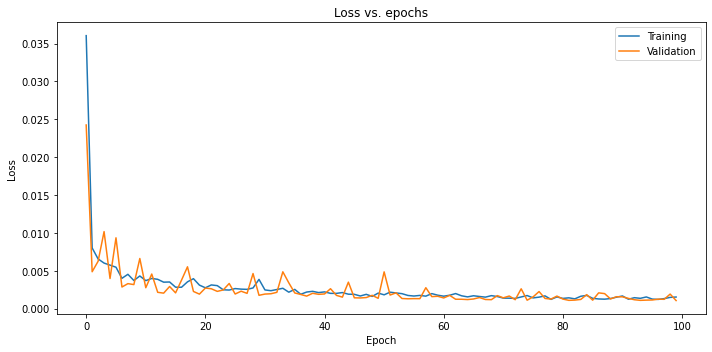

In [148]:
history_2 = model_2.fit(x_train, y_train, batch_size=None, epochs=100, validation_split=0.15, verbose=1)
frame = pd.DataFrame(history_2.history)

# plot

plt.figure(figsize=(10,5))
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'],loc='upper right')
plt.tight_layout()
plt.show()

In [149]:
predicted_prices = model_2.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

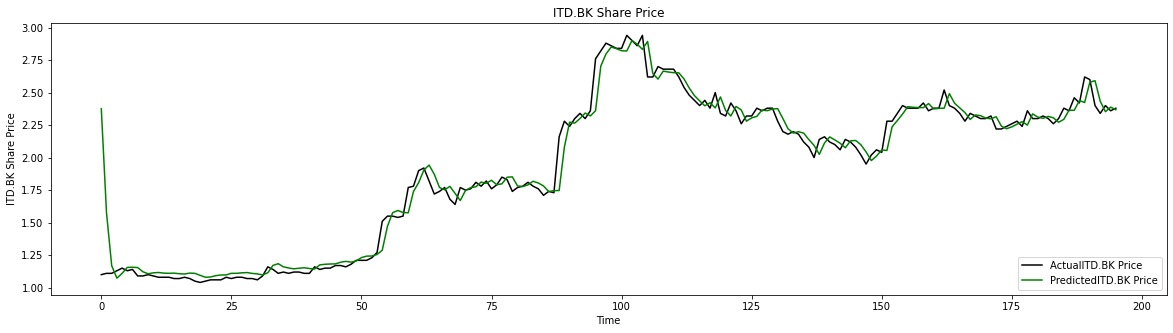

In [150]:

# plot the test predictions
plt.figure(figsize=(20,5))
plt.plot(actual_prices,color='black',label=f'Actual{stock} Price')
plt.plot(predicted_prices,color='green',label=f'Predicted{stock} Price')
plt.title(f'{stock} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{stock} Share Price')

plt.legend(loc='lower right')
plt.show()

In [151]:
# Predict Next day

real_data = [x_inputs[len(x_inputs)-prediction_days:len(x_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],fearture))
prediction = model_2.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print (f'Prediction: {prediction}')

Prediction: [[2.3750963]]


#New Model

In [91]:
#separate input data
X1 = x_train[:, :].reshape(x_train.shape[0], x_train.shape[1], fearture)
X2 = x_train[:, :].reshape(x_train.shape[0], x_train.shape[1], fearture)

X1test = x_test[:, :].reshape(x_test.shape[0], x_test.shape[1], fearture)
X2test = x_test[:, :].reshape(x_test.shape[0], x_test.shape[1], fearture)

print(X1.shape, X2.shape)
print(X1test.shape, X2test.shape)

(623, 60, 1) (623, 60, 1)
(196, 60, 1) (196, 60, 1)
